<a href="https://colab.research.google.com/github/Nyillu/Algorithms_Big_Data_Zavadskaya/blob/main/regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressor

This notebook presents work with regression models to predict target value - `gap`.

The following models were used:

- [ ] LightGBM
- [ ] XGBoost
- [ ] Gradient Boosting


This code is made to be run locally within current repository. If you work in Google Colab, adjust the path to the `data_normalized.csv` file accordingly and install the libraries provided in the *requirements*.

# Requirements

In [ ]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

import time
from sklearn.metrics import r2_score

In [ ]:
# data = pd.read_csv('data_normalized.csv')
data = pd.read_csv('data_normalized.csv')

In [ ]:
data

,smiles,gap,A,B,mu,alpha,u0,cv,MaxAbsEStateIndex,MinAbsEStateIndex,...,n4HRing,n6aRing,n5FRing,n6FRing,n7FRing,n8FRing,n9FRing,GGI4,Radius,TopoShapeIndex
0,OC1CC2(CC2)CC1=O,0.2229,0.058754,0.153874,0.126418,0.421170,0.489892,0.555688,0.829230,0.036885,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.346154,0.5,0.333333
1,C1CC1NC2=NCCO2,0.2788,0.090617,0.101410,0.062398,0.449967,0.500195,0.514633,0.325505,0.394454,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.173077,0.5,0.666667
2,C#CC12CC1C1OC21,0.2499,0.091919,0.234986,0.066716,0.342451,0.698876,0.360082,0.339281,0.158470,...,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.326923,0.0,1.000000
3,CC1OCOCC1C#C,0.3013,0.038266,0.238226,0.086291,0.437736,0.490020,0.576568,0.329170,0.081284,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.363077,0.5,0.666667
4,N=C1OC2C1CCC2=O,0.2058,0.059388,0.194392,0.084339,0.357127,0.449933,0.407337,0.827437,0.088798,...,0.166667,0.0,0.0,0.0,1.0,0.0,0.0,0.437692,0.5,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19611,CC12C3COC1OCC23,0.3306,0.041433,0.284555,0.130151,0.396264,0.489928,0.447396,0.347303,0.094262,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.500000
19612,c1c(ncnc1F)F,0.2447,0.077785,0.256467,0.045203,0.141984,0.383117,0.171898,0.918294,0.360656,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.307692,0.5,0.333333
19613,O=C1CC2NC2C2CN12,0.2524,0.045481,0.302529,0.231973,0.383033,0.503466,0.403611,0.845230,0.208333,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.326923,0.5,0.333333
19614,CC#CC(O)C1(C)CC1,0.2877,0.048528,0.103806,0.092455,0.555481,0.586623,0.763308,0.694734,0.083730,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.283846,0.5,0.666667


In [ ]:
# Разделим данные на признаки и целевую переменную
X = data.drop(['gap', 'smiles'], axis=1)
y = data['gap']

# LightGBM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = lgb.LGBMRegressor()

start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28336
[LightGBM] [Info] Number of data points in the train set: 15692, number of used features: 204
[LightGBM] [Info] Start training from score 0.251010


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28505
[LightGBM] [Info] Number of data points in the train set: 17654, number of used features: 204
[LightGBM] [Info] Start training from score 0.251076
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28462
[LightGBM] [Info] Number of data points in the train set: 17654, number of used features: 204
[LightGBM] [Info] Start training from score 0.250963
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014323 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28487
[LightGBM] [Info] Number of data points in the train set: 17654, number of used features: 204
[LightGBM] [Info] Sta

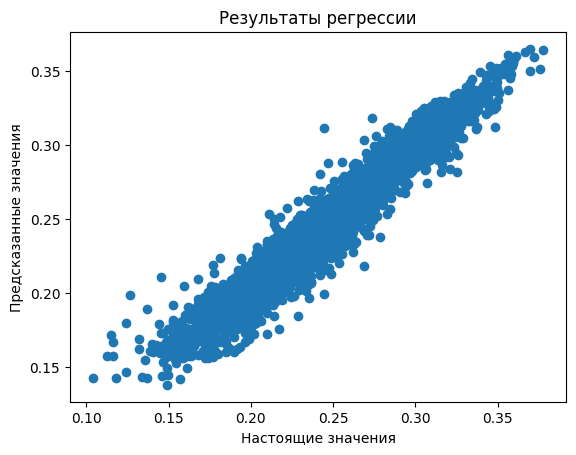

Метрики на тестовой выборке:
R2: 0.9452734875965069

Метрики при кросс-валидации:
Среднее R2: 0.9450375678663473

Время, затраченное на обучение модели: 0.8416924476623535 секунд


In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели

cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")

print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# XGBoost

In [ ]:
# Определим модель XGBoost
model = xgb.XGBRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

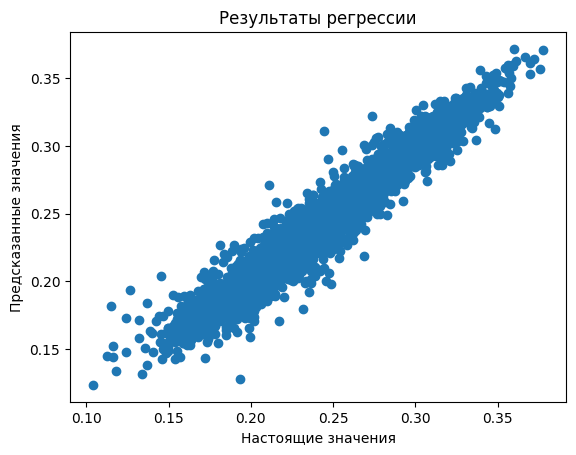

Метрики на тестовой выборке:
R2: 0.9459430070798149

Метрики при кросс-валидации:
Среднее R2: 0.9460619340480184

Время, затраченное на обучение модели: 1.2952466011047363 секунд


In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели

cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")

print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")

print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# Gradient Boosting

In [ ]:
# Определим модель
model = GradientBoostingRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

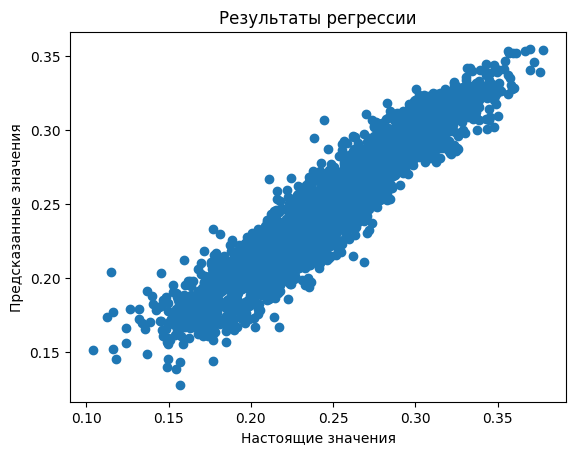

Метрики на тестовой выборке:
R2: 0.9128397678156441

Метрики при кросс-валидации:
Среднее R2: 0.9089348272521495

Время, затраченное на обучение модели: 45.71426701545715 секунд


In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности

r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели

cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")

print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")

print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# Hyperparameters

The fastest model is LightGBM. We selected hyperparameters for it, but it did not improve the result.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Создаем объект модели LightGBM
model = lgb.LGBMRegressor()

# Задаем сетку гиперпараметров для перебора
param_grid = {
    'num_leaves': [30, 50],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
}
# Создание объекта GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Обучение модели с оптимизацией гиперпараметров
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Получение лучших параметров
best_params = grid_search.best_params_

# Предсказание на тестовой выборке с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Лучшие параметры:", best_params)
print("\nМетрики на тестовой выборке с лучшей моделью:")

print(f"R2: {r2}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели с оптимизированными гиперпараметрами: {training_time} секунд")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 13192, number of used features: 61
[LightGBM] [Info] Start training from score 0.507145
Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 50}

Метрики на тестовой выборке с лучшей моделью:
R2: 0.8864785849846685

Время, затраченное на обучение модели с оптимизированными гиперпараметрами: 1919.864819765091 секунд
